# Naive Bayes Classifier for spam email

https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset/

A classic supervised learning task, spam identification, is presented here with a dataset containing emails defined as spam or not spam.  
We implement a Naive Bayes classifier using Scikit Learn to construct a model which accurately identifies unseen email as spam or not.
We obtain a model that is unbiased, efficient, and 99% accurate. 

In [2]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

### Load data

In [3]:
# Download latest version
path = kagglehub.dataset_download("jackksoncsie/spam-email-dataset")

#print("Path to dataset files:", path)

In [4]:
# Load dataset
# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv(path+'/emails.csv')

# Display the first few rows of the DataFrame
print(df.head())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
#Check for missing data
df.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:
#Separate data into a train and test set to validate the accuracy of our model
X=df['text']
y=df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [9]:
vectorizer = CountVectorizer(stop_words='english')

#get document term matrix DTM
X_train_dtm = vectorizer.fit_transform(X_train);
X_test_dtm = vectorizer.transform(X_test);  #only transform on unseen test data
X_train_dtm.shape, X_test_dtm.shape
#creates compressed sparse row (CSR) matrix, for efficient storage.

((4296, 32973), (1432, 32973))

### Train a Naive Bayes model

In [10]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred = nb.predict(X_test_dtm)

### Evaluate accuracy

In [11]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1090
           1       0.97      0.99      0.98       342

    accuracy                           0.99      1432
   macro avg       0.99      0.99      0.99      1432
weighted avg       0.99      0.99      0.99      1432



0.9909217877094972

In [12]:
#Demonstrate out of sample testing
#Select 10 true and 10 false and show predictions
sampleix = y_test[y_test==True][:10].index
sampleix = sampleix.append(y_test[y_test==False][:10].index)

#X_test.loc[sampleix]
#y_test.loc[sampleix]
X_sample_test_dtm = vectorizer.transform(X_test.loc[sampleix])

#make predictions on these 20
y_sample_pred=nb.predict(X_sample_test_dtm)

#Display as dataframe
df=pd.DataFrame(X_test.loc[sampleix]).assign(spam=y_test.loc[sampleix]).assign(pred=y_sample_pred)
df

,text,spam,pred
587,Subject: porn p . o . : your 10 free pictures ...,1,1
156,Subject: do i require an attorney to use this ...,1,1
1045,"Subject: all graphics software available , che...",1,1
529,Subject: hi how to save on customer your medl...,1,1
1234,Subject: want to make women adore you ? click ...,1,1
1211,Subject: you can gain from lowest interest rat...,1,1
209,Subject: the next move higher for strong marke...,1,1
571,Subject: adv oil and gas investment tgym how ...,1,1
443,Subject: more site sales do you take credit c...,1,1
1204,Subject: better sex ! better relationship ! a...,1,1


### Demonstrate generalization of model

In [13]:
t=['Dear Mr. Kenobi, Subject: Help, you''re my only hope!  Best Regards, Princess Laia',
   'buy viagra from our online pharmacy.',
   'Dear customer, Try our luxurious body lotions today, risk free!',
   'You may regret missing this promo!',
   'Subject: Mr. Levenstein, Your statement is ready. View your first statement now.  Sign in at onlinebank.com.  Thank you for being a valued customer.',
   'Hey there, I just wanted to touch base about the upcoming meeting. Give me a call at 123-456-7890',
  ]
t_dtm=vectorizer.transform(t)
nb.predict(t_dtm)

array([0, 1, 1, 1, 1, 0])

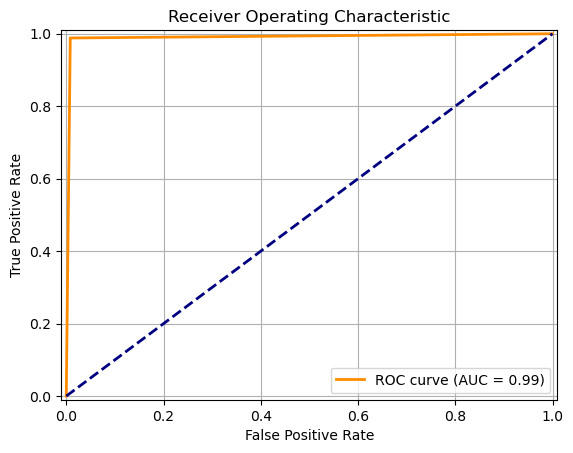

In [14]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [27]:
#Evaluate Prediction Bias
#Prediction bias is the difference between the average prediction of the model and the average ground truth label in the data.

#
pb_label = y_train.mean()
pb_model = y_pred.mean()
prediction_bias_pct = (pb_model/pb_label)-1
print("Prediction Bias:")
print(f"Mean ground truth label: {pb_label}")
print(f"Mean model prediction:   {pb_model}")
print(f"Prediction bias:         {prediction_bias_pct:.2%}")


Prediction Bias:
Mean ground truth label: 0.2388268156424581
Mean model prediction:   0.24231843575418993
Prediction bias:         1.46%
